# Tasca M5 T01

Objectivos
- Planteamiento de una hipótesis.
- Uso de los test de hipótesis en python.
- Uso e interpretación del p-valor por uno o más de un atributo.
- Aplicación del test de hipótesis e interpretación de los resultados.

Durada: 3 dies

Descripció
Ejercicios de Hipotesis Testing.

## Exercici 1

- Descarga el dataset adjunto de datos oficiales de la UEFA y selecciona un atributo del conjunto de datos. 
- Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%.

In [1]:
# 1º Intento cargar la tabla con el código: UEFA = pd.read_csv('231205 Lligues europees UEFA.csv')
# pero me da este error: UnicodeDecodeError:'utf-8' codec can't decode byte 0xe9 in position 92: invalid continuation byte
# Según CHAT GPT es porque el archivo CSV contiene caracteres que no pueden ser decodificados correctamente==> 
# utilizando el esquema de codificación UTF-8, que es el predeterminado al leer archivos en Python.
# Para solucionarlo me pide que le indique en el código la codificación del archivo.
# Las posibles codificiaciones de archivo son las siguientes: 'ISO-8859-1', 'latin1', 'cp1252', o 'utf-8'
# Voy probando con ellas a ver cual me funciona
# Me va dando errores porque el separador no es ',', sino ';' ==> se lo indico en la instrucción

import pandas as pd

UEFA = pd.read_csv('231205 Lligues europees UEFA.csv', encoding='ISO-8859-1', sep=';')
UEFA

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [2]:
# Solicito análisis estadístico de la tabla: 
UEFA.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [3]:
# Solicito información de los datos de cada columna
UEFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

Una vez analizada la tabla, decido que hay cuatro variables en las que me interesa analizar, cada una de forma separada, si siguen o no una distribución normal. Esas cuatro variables son: 
- número de VICTORIAS	
- número de EMPATES	
- número de DERROTAS
- ASISTENCIA DE PÚBLICO

Voy a hacer un test para cada una de ellas con las siguientes hipótesis: 
- H0 : La variable en cuestión SÍ sigue una distribución normal
- Ha : La variable en cuestión NO sigue una distribución normal

Como me interesa saber si siguen la distribución normal en diferentes niveles de significancia (no solo al 5%), aplico el __Test de Anderson-Darling__ para cada una de ellas, cuya tabla de rechazo de hipótesis es la siguiente:
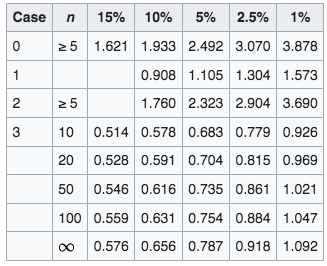

__EMPIEZO CON LA VARIABLE *VICTORIAS*__

In [5]:
from scipy.stats import anderson

VICTORIAS = UEFA['W'] # Identifico los datos de la columna que me interesa como VICTORIAS

result = anderson (VICTORIAS) # Le aplico la prueba de Anderson y almaceno el resultado en la variable result.

print('El p-valor asociado a la estadística de la prueba es=%.3f' % (result.statistic)) 

# Ahora voy a hacer una comparación con valores críticos mediante un loop:
# Utilizo "result.critical_values", que es un atributo que en la prueba de Anderson 
# almacena los valores críticos asociados con diferentes niveles de significancia.

for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i] # sl= Signifiancia Level / cv = critical values
# Itero sobre los valores críticos y niveles de significancia proporcionados por la prueba de Anderson
# result.critical_values[i]: Obtiene el valor crítico correspondiente al nivel de significancia actual.
# result.significance_level[i]: Obtiene el nivel de significancia actual.

 if result.statistic < cv: # Aquí compara el estadístico obtenido con los valores críticos que tiene definidos.
    print('Al nivel de significancia %.1f%% esta variable probalemente SÍ sigue una distribución normal' % (sl))
 else:
     print('Al nivel de significancia %.1f%% esta variable probalemente NO sigue una distribución normal' % (sl))
        


El p-valor asociado a la estadística de la prueba es=1.046
Al nivel de significancia 15.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 10.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 5.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 2.5% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 1.0% esta variable probalemente SÍ sigue una distribución normal


Según el test de Anderson, es muy poco probable que la variable VICTORIAS siga una distribución normal. 

Hago una representación gráfica para contrastar esta conclusión.

En realidad, a la vista de la representación gráfica, no me queda claro que la distribución no sea Gausiana

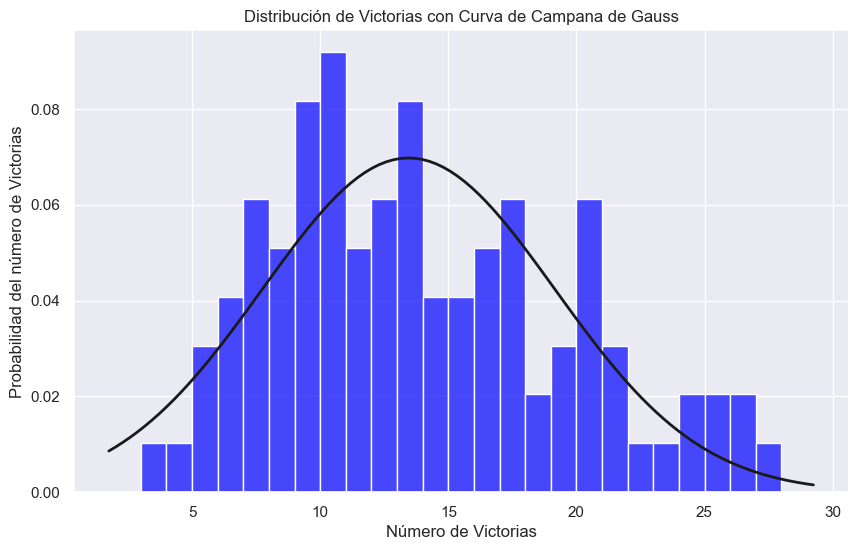

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Ajusto la distribución normal a los datos
mu, std = norm.fit(UEFA['W'])

# Creo un gráfico de densidad de probabilidad (PDF)
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(UEFA['W'], kde=False, bins=25, color='blue', alpha=0.7, stat="density")

# Añado la curva de campana de Gauss
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Añado etiquetas y título
plt.title('Distribución de Victorias con Curva de Campana de Gauss')
plt.xlabel('Número de Victorias')
plt.ylabel('Probabilidad del número de Victorias')

# Mostrar la gráfica
plt.show()

__ANALIZO LA VARIABLE EMPATES__: 

Aplico el código para aplicar el test de Anderson y le pido la representación gráfica para que me ayude a contrastar:

El p-valor asociado a la estadística de la prueba es=0.753
Al nivel de significancia 15.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 10.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 5.0% esta variable probalemente SÍ sigue una distribución normal
Al nivel de significancia 2.5% esta variable probalemente SÍ sigue una distribución normal
Al nivel de significancia 1.0% esta variable probalemente SÍ sigue una distribución normal


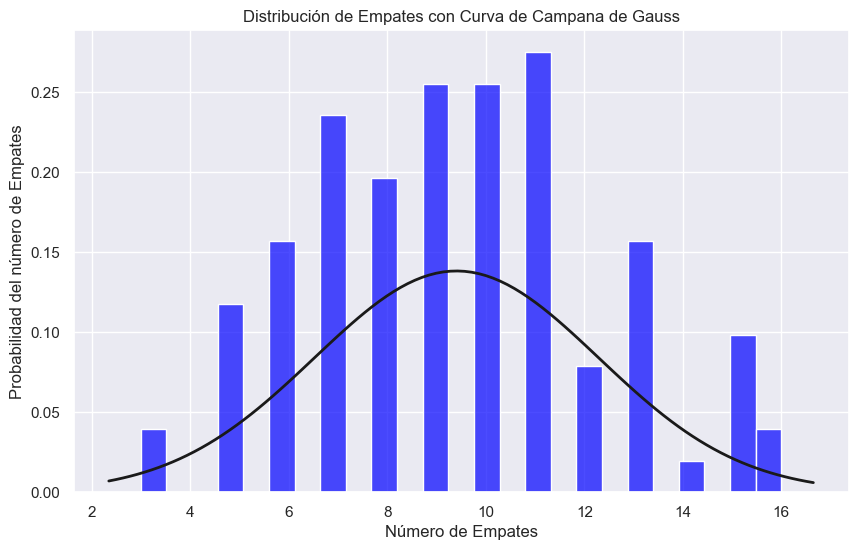

In [58]:
# Identifico los datos de la columna que me interesa como EMPATES
EMPATES = UEFA['D'] 

# Le aplico la prueba de Anderson.
result = anderson (EMPATES)  

print('El p-valor asociado a la estadística de la prueba es=%.3f' % (result.statistic)) 

for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i] 
 if result.statistic < cv: 
    print('Al nivel de significancia %.1f%% esta variable probalemente SÍ sigue una distribución normal' % (sl))
 else:
     print('Al nivel de significancia %.1f%% esta variable probalemente NO sigue una distribución normal' % (sl))

# Creo la gráfica para que me ayude a contrastar

mu, std = norm.fit(UEFA['D'])

sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(UEFA['D'], kde=False, bins=25, color='blue', alpha=0.7, stat="density")

# Añado la curva de campana de Gauss
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


plt.title('Distribución de Empates con Curva de Campana de Gauss')
plt.xlabel('Número de Empates')
plt.ylabel('Probabilidad del número de Empates')

plt.show()        

__ANALIZO LA VARIABLE DERROTAS__: 

Aplico el código para aplicar el test de Anderson y le pido la representación gráfica para que me ayude a contrastar:

El p-valor asociado a la estadística de la prueba es=0.344
Al nivel de significancia 15.0% esta variable probalemente SÍ sigue una distribución normal
Al nivel de significancia 10.0% esta variable probalemente SÍ sigue una distribución normal
Al nivel de significancia 5.0% esta variable probalemente SÍ sigue una distribución normal
Al nivel de significancia 2.5% esta variable probalemente SÍ sigue una distribución normal
Al nivel de significancia 1.0% esta variable probalemente SÍ sigue una distribución normal


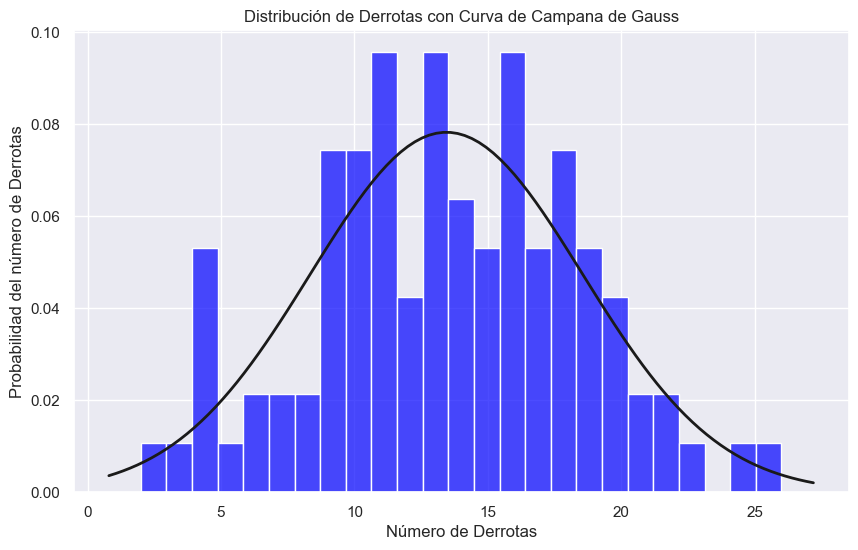

In [13]:
# Identifico los datos de la columna que me interesa como DERROTAS
DERROTAS = UEFA['L'] 

# Le aplico la prueba de Anderson.
result = anderson (DERROTAS)  

print('El p-valor asociado a la estadística de la prueba es=%.3f' % (result.statistic)) 

for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i] 
 if result.statistic < cv: 
    print('Al nivel de significancia %.1f%% esta variable probalemente SÍ sigue una distribución normal' % (sl))
 else:
     print('Al nivel de significancia %.1f%% esta variable probalemente NO sigue una distribución normal' % (sl))

# Creo la gráfica para que me ayude a contrastar

mu, std = norm.fit(UEFA['L'])

sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(UEFA['L'], kde=False, bins=25, color='blue', alpha=0.7, stat="density")

# Añado la curva de campana de Gauss
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


plt.title('Distribución de Derrotas con Curva de Campana de Gauss')
plt.xlabel('Número de Derrotas')
plt.ylabel('Probabilidad del número de Derrotas')

plt.show()        

__ANALIZO LA VARIABLE ASISTENCIA DE PÚBLICO (Attendance)__: 

Aplico el código para aplicar el test de Anderson y le pido la representación gráfica para que me ayude a contrastar:

El p-valor asociado a la estadística de la prueba es=2.749
Al nivel de significancia 15.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 10.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 5.0% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 2.5% esta variable probalemente NO sigue una distribución normal
Al nivel de significancia 1.0% esta variable probalemente NO sigue una distribución normal


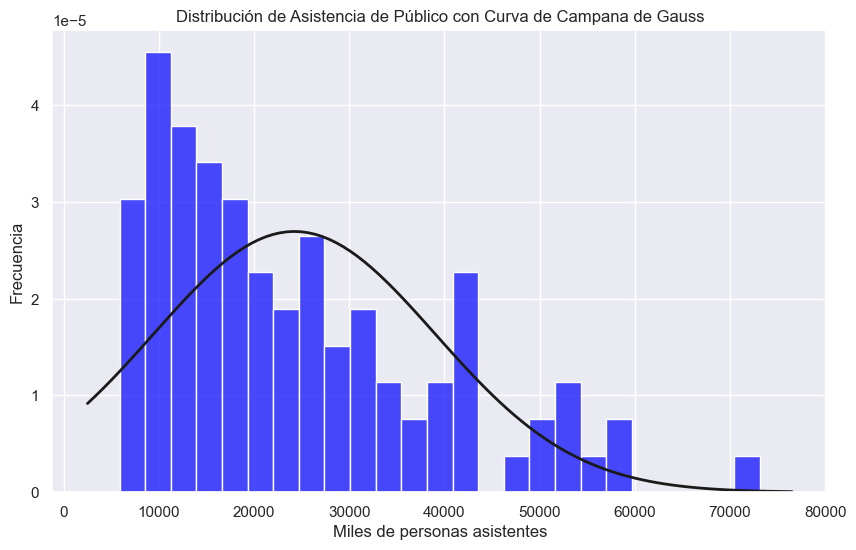

In [44]:
# Identifico los datos de la columna que me interesa como PÚBLICO
PUBLICO = UEFA['Attendance'] 

# Le aplico la prueba de Anderson.
result = anderson (PUBLICO)  

print('El p-valor asociado a la estadística de la prueba es=%.3f' % (result.statistic)) 

for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i] 
 if result.statistic < cv: 
    print('Al nivel de significancia %.1f%% esta variable probalemente SÍ sigue una distribución normal' % (sl))
 else:
     print('Al nivel de significancia %.1f%% esta variable probalemente NO sigue una distribución normal' % (sl))

# Creo la gráfica para que me ayude a contrastar

mu, std = norm.fit(UEFA['Attendance'])

sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(UEFA['Attendance'], kde=False, bins=25, color='blue', alpha=0.7, stat="density")

# Añado la curva de campana de Gauss
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


plt.title('Distribución de Asistencia de Público con Curva de Campana de Gauss')
plt.xlabel('Miles de personas asistentes')
plt.ylabel('Frecuencia')

plt.show()        

### CONCLUSIÓN DEL EJERCICIO 1

A la vista de los datos obtenidos podemos afirmar: 
- La variable DERROTAS sigue una distribución normal gaussiana con una seguridad del 100%.
- No es del todo seguro que las variables VICTORIAS Y EMPATES sigan una distribución normal gaussiana, aunque de ambas, la variable EMPATES se aproxima más a esta distribucion.
- Con un 100% de seguridad, la variable público no sigue una distribución normal gaussiana.

__.........................................................................................................................................................................................................................................................................__

## Exercici 2

Con el mismo dataset: 
- selecciona otros dos atributos del conjunto de datos. 
- Calcula los p-valores y di si rechazan la hipótesis nula cogiendo un alfa de 5%.

Me intersa comparar si existe correlación entre dos variables: GOLES ESPERADOS (__xG__) Y PUBLICO ASISTENTE. 

Con ello pretendo analizar si el público que asiste a los estadios lo hace en función de la espectativa de los goles.

Las hipótesis que planteo: 
- H0: las dos muestras nos independientes
- H1: existe una dependencia entre las muestras.

Para asegurarme del resultado, voy a realizar el análisis de esta correlación con dos tipos de tests: 
- El test de Pearson, que prueba si dos muestras tienen una relación LINEAL constante.
- El test de Spearman, que prueba si dos muestras tienen una relación MONITÓNICA (que aumentan o disminuyen pero no a ritmos constante).

In [34]:
# Aplico el test de Pearson
from scipy.stats import pearsonr

data1 = UEFA['xG']
data2 = UEFA['Attendance']

stat, p = pearsonr(data1, data2)

print('El estadístico obtenido es=%.3f' %stat)
print('El valor-p es=%.8f' % p)
if p > 0.05:
 print('Las dos variables son independientes')
else:
 print('Probablemente existe una dependencia entre las variables')

El estadístico obtenido es=0.493
El valor-p es=0.00000025
Probablemente existe una dependencia entre las variables


In [35]:
# Aplico el test de Spearman 
from scipy.stats import spearmanr

data1 = UEFA['xG']
data2 = UEFA['Attendance']

stat, p = spearmanr(data1, data2)

print('El estadístico obtenido es=%.3f, El valor-p es=%.7f' % (stat, p))
if p > 0.05:
 print('Las dos variables son independientes')
else:
 print('Probablemente existe una dependencia entre las variables')

El estadístico obtenido es=0.456, El valor-p es=0.0000024
Probablemente existe una dependencia entre las variables


### CONCLUSIÓN DEL EJERCICIO 2
Según se concluye por ambos tets, se puede afirmar que la asitencia de público a los estadios está condicionada por la espectativa que tiene ese público de ver marcar un gol. 

__.........................................................................................................................................................................................................................................................................__

## Exercici 3

Continúa con el conjunto de datos adjunto: 
- selecciona tres atributos del conjunto de datos. 
- Calcula el p-valor y di si rechaza la hipótesis nula cogiendo un alfa de 5%. 

Me interesa saber si las variables DIFERENCIA DE GOLES ESPERADA (__xGD__) y DIFERENCIA DE GOLES ESPERADA EN 90 MIN (__xGD/90__) son buenos estimadores de la DIFERENCIA DE GOLES real (__GD__).

Para ello aplico un ANÁLISIS DE LA VARIANZA (ANOVA) con el que voy a probar si las medias de las tres muestras, (que a mi juicio no son independientes), son significativamente diferentes.

Las hipótesis que formulo: 
- H0: las medias de las muestras son iguales.
- H1: una o más de las medias de las muestras son desiguales.

In [43]:
# Aplico el test del Análisis de la Varianza (ANOVA)

from scipy.stats import f_oneway

data1 = UEFA['GD']
data2 = UEFA['xGD']
data3 = UEFA['xGD/90']

stat, p = f_oneway(data1, data2, data3)

print('El estadístico obtenido es=%.6f, El valor-p es=%.6f' % (stat, p))

if p > 0.05:
 print('Las tres muestras siguen probablemente la misma distribution y las variables xGD y xGD/90 son buenos estimadores')
else:
 print('Las tres muestras probablemente no siguen la misma distribution y las variables xGD y xGD/90 NO son buenos estimadores')

El estadístico obtenido es=0.000003, El valor-p es=0.999997
Las tres muestras siguen probablemente la misma distribution y las variables xGD y xGD/90 son buenos estimadores


### CONCLUSIÓN DEL EJERCICIO 3
Existen razones justificadas para pensar que el resultado neto en goles que va a obtener un equipo (y de cuyo dato depende su clasificación en el ranking) se puede predecir a partir de las variables: 
- DIFERENCIA DE GOLES ESPERADA (__xGD__)
- DIFERENCIA DE GOLES ESPERADA EN 90 MIN (__xGD/90__)

__.........................................................................................................................................................................................................................................................................__

## APÉNDICE

Una vez realizados los ejercicios, me surge la curiosidad de saber si los equipos españóles han sido más goleados en promedio que el resto de equipos europeos. 

Para averiguarlo planteo un test de Student agrupando los datos de la columna GOLES EN CONTRA (__GA__) en dos categorias: ESPAÑA Y RESTO. 

Planteo las siguientes hipótesis: 
- H0 : A los equipos españoles, en promedio, NO les meten más goles que al resto de equipos europeos
- H1 : A los equipos españoles, en promedio, SÍ les meten más goles que al resto de equipos europeos

In [57]:
# Aplico el test T de Student
from scipy.stats import ttest_ind

goles_contra_espana = UEFA[UEFA['Country'] == 'ESP']['GA']
goles_contra_resto = UEFA[UEFA['Country'] != 'ESP']['GA']

stat, p = ttest_ind(goles_contra_espana, goles_contra_resto)

print('El estadístico obtenido es=%.3f, El valor-p es=%.3f' % (stat, p))

if p_valor < 0.05:
    print("Rechazamos la hipótesis nula.")
    print("Hay evidencia significativa de que a los equipos españoles, en promedio, les metan más goles que al resto de equipos europeos.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar que a los equipos españoles, en promedio, les metan más goles que al resto de equipos europeos.")

El estadístico obtenido es=-1.623, El valor-p es=0.108
No podemos rechazar la hipótesis nula.
No hay suficiente evidencia para afirmar que a los equipos españoles, en promedio, les metan más goles que al resto de equipos europeos.
